<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [2]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

Intercept:  [ 30.28894834]
Coefficients:  [[ -1.12463481e-01   3.00810168e-02   4.07309919e-02   2.78676719e+00
   -1.72406347e+01   4.43248784e+00  -6.23998173e-03  -1.44848504e+00
    2.62113793e-01  -1.06390978e-02  -9.16398679e-01   1.24516469e-02
   -5.09349120e-01]]
Training dataset error = 10.8208
Testing dataset error = 12.1557


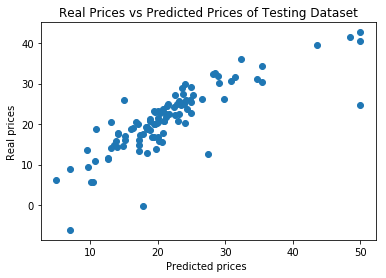

In [3]:
# Task 1-1: use linear regression in sklearn

linreg = linear_model.LinearRegression()            # Creates linear regression object
linreg.fit(train_data, train_target)   # Training with the training data
train_p = linreg.predict(train_data)   # Predict the target using training data
test_p = linreg.predict(test_data)     # Predict the target using test data

# Task 1-2: show intercept and coefficents

print ('Intercept: ', linreg.intercept_)   # Prints the intercepts using sklearn

print ('Coefficients: ', linreg.coef_)     # Prints the coefficients using sklearn

# Task 1-3: show errors on training dataset and testing dataset

trainingdataseterror = np.mean((train_target - train_p) ** 2)/2  # Calculate Errors in training dataset
testingdataseterror = np.mean((test_target - test_p) ** 2)/2     # Calculate Errors in testing dataset

print('Training dataset error ='+' '+"%.4f" %trainingdataseterror)    # print training dataset error
print('Testing dataset error ='+' '+"%.4f" %testingdataseterror)      # print testing dataset error


# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset

plt.scatter(test_target, test_p)   # Plot a graph with target values as x and predicted values as y
plt.xlabel("Predicted prices ")
plt.ylabel("Real prices")
plt.title("Real Prices vs Predicted Prices of Testing Dataset")

<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

Intercept:  [[  1.00000000e+00   1.50234000e+01   0.00000000e+00   1.81000000e+01
    0.00000000e+00   6.14000000e-01   5.30400000e+00   9.73000000e+01
    2.10070000e+00   2.40000000e+01   6.66000000e+02   2.02000000e+01
    3.49480000e+02   2.49100000e+01]]
Coefficients:  [[  1.00000000e+00   6.27390000e-01   0.00000000e+00 ...,   2.10000000e+01
    3.95620000e+02   8.47000000e+00]
 [  1.00000000e+00   3.46600000e-02   3.50000000e+01 ...,   1.69000000e+01
    3.62250000e+02   7.83000000e+00]
 [  1.00000000e+00   7.05042000e+00   0.00000000e+00 ...,   2.02000000e+01
    2.52000000e+00   2.32900000e+01]
 ..., 
 [  1.00000000e+00   1.50100000e-02   8.00000000e+01 ...,   1.70000000e+01
    3.90940000e+02   5.99000000e+00]
 [  1.00000000e+00   1.11604000e+01   0.00000000e+00 ...,   2.02000000e+01
    1.09850000e+02   2.32700000e+01]
 [  1.00000000e+00   2.28760000e-01   0.00000000e+00 ...,   2.09000000e+01
    7.08000000e+01   1.06300000e+01]]
Training dataset error = 10.8208
Testing data

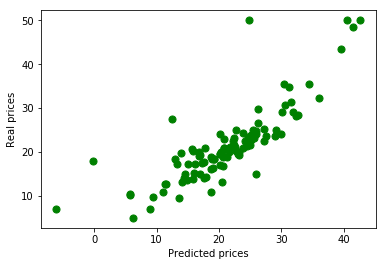

In [4]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights

def myNormalEqualFun(X,y):
    Z = X.transpose().dot(X)    # get value of transposed X multiplied by X
    Y = np.linalg.inv(Z)        # get inversed version value of earlier step
    Q = Y.dot(X.transpose())    # multiply the result of previous step by transposed X
    normalEq = Q.dot(y)         # get the final value by multiplying with y
    return normalEq
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions

def myPredictFun(X,w):
    return X.dot(w)             # multiplication of X by a vector of weights

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)

train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)


# Here we call myNormalEqual to train the model and get weights

w = myNormalEqualFun(train_data_intercept,train_target)


predTest = myPredictFun(test_data_intercept, w) #getting predictions for test dataset
predTrain = myPredictFun(train_data_intercept, w) #getting predictions for train dataset

# Task 2-3: show intercept and coefficents

print ('Intercept: ', train_data_intercept[:1:2])
print ('Coefficients: ', train_data_intercept[1:])


# Task 2-4: show errors on training dataset and testing dataset

trainingDatasetError = np.mean((train_target - predTrain) ** 2)/2
testingDatasetError = np.mean((test_target - predTest) ** 2)/2

print('Training dataset error ='+' '+"%.4f" %trainingDatasetError)
print('Testing dataset error ='+' '+"%.4f" %testingDatasetError)

# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(predTest, test_target,  s=50, color = 'green')
plt.xlabel("Predicted prices")
plt.ylabel("Real prices")

<h4> Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

Intercept:  [[ 1.          1.29133866 -0.50032012  1.03323679 -0.27808871  0.48925206
  -1.42806858  1.02801516 -0.80217296  1.70689143  1.57843444  0.84534281
  -0.07433689  1.75350503]]
Coefficients:  [[ 1.         -0.3338103  -0.50032012 ...,  1.20474139  0.4301838
  -0.5614742 ]
 [ 1.         -0.40072291  1.01327135 ..., -0.63717631  0.06529747
  -0.65159505]
 [ 1.          0.39127814 -0.50032012 ...,  0.84534281 -3.86819251
   1.52538664]
 ..., 
 [ 1.         -0.40294118  2.95931752 ..., -0.59225149  0.37901005
  -0.91069248]
 [ 1.          0.85524904 -0.50032012 ...,  0.84534281 -2.69458597
   1.52257036]
 [ 1.         -0.37881118 -0.50032012 ...,  1.15981657 -3.12158061
  -0.25731635]]
Training dataset error = 10.8208
Testing dataset error = 12.1557


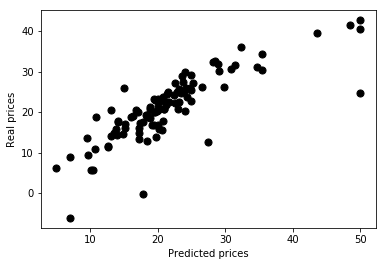

In [5]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    w = np.zeros((X.shape[1], 1)) #w[0][0] = 1.0
    for i in range(0, numItrs):
        costFunction = np.divide(X.transpose().dot(np.subtract(y, np.dot(X, w))), X.shape[0])
        w = w + (learning_rate * costFunction)
    return w 

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w) # multiplication of X by its vector of weights.

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept,train_target,0,0)

# Task 3-3: show intercept and coefficents
print ('Intercept: ', train_data_intercept[:1])
print ('Coefficients: ', train_data_intercept[1:])

# Task 3-4: show errors on training dataset and testing dataset
Training_dataset_error = np.mean((train_target - train_p) ** 2)/2
Testing_dataset_error = np.mean((test_target - test_p) ** 2)/2

print('Training dataset error ='+' '+"%.4f" %Training_dataset_error)
print('Testing dataset error ='+' '+"%.4f" %Testing_dataset_error)

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, test_p, s=50, color='black')
plt.xlabel("Predicted prices")
plt.ylabel("Real prices")